## imports

In [57]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv("Titanic-Dataset.csv")
profile = ProfileReport(df, title="My Data Report")

# Save as HTML file to view in browser
profile.to_file("data_report.html")
print("Report saved as data_report.html - open it in your browser")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 21.97it/s]

Report saved as data_report.html - open it in your browser


In [58]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Sex' column
df['Sex'] = le.fit_transform(df['Sex'])

# Encode 'Embarked' column
df['Embarked'] = le.fit_transform(df['Embarked'])


# Drop non-predictive columns
columns_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(columns=columns_to_drop, errors='ignore')

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [59]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(axis=0, how='any', inplace=True)

# Verify no missing values remain
print("\nMissing values after cleaning:")
print(df.isnull().sum())

df.head()

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [60]:
target_name = "Embarked"

x = df.drop(columns="Embarked")
y = df[target_name]
x.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score , precision_score, recall_score, confusion_matrix

# Define the model
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Initial Model Evaluation:")
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("\nF1:", f1_score(y_test, y_pred, average='weighted'))
print("\nPrecision score:", precision_score(y_test, y_pred, average='weighted'))
print("\nRecall score:", recall_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Initial Model Evaluation:
accuracy_score: 0.8321678321678322

F1: 0.7948143810212775

Precision score: 0.7797144812070186

Recall score: 0.8321678321678322

Confusion Matrix:
 [[  5   0  15   0]
 [  0   0   4   0]
 [  4   0 114   0]
 [  0   0   1   0]]


c:\Users\DELL\Desktop\DL__SOAI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [63]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Define the model
clf = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],   # number of neighbors
    'weights': ['uniform', 'distance'], # how neighbors are weighted
    'metric': ['euclidean', 'manhattan', 'minkowski'] # distance metric
}

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # For classification tasks
    n_jobs=-1
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Best estimator
best_clf = grid_search.best_estimator_

# Predictions with best model
y_pred = best_clf.predict(x_test)



print("Initial Model Evaluation:")
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("\nF1:", f1_score(y_test, y_pred, average='weighted'))
print("\nPrecision score:", precision_score(y_test, y_pred, average='weighted'))
print("\nRecall score:", recall_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))






c:\Users\DELL\Desktop\DL__SOAI\venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Score: 0.7670327993897789
Initial Model Evaluation:
accuracy_score: 0.8391608391608392

F1: 0.7937811811114979

Precision score: 0.791928266380821

Recall score: 0.8391608391608392

Confusion Matrix:
 [[  4   0  16   0]
 [  0   0   4   0]
 [  2   0 116   0]
 [  0   0   1   0]]


c:\Users\DELL\Desktop\DL__SOAI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


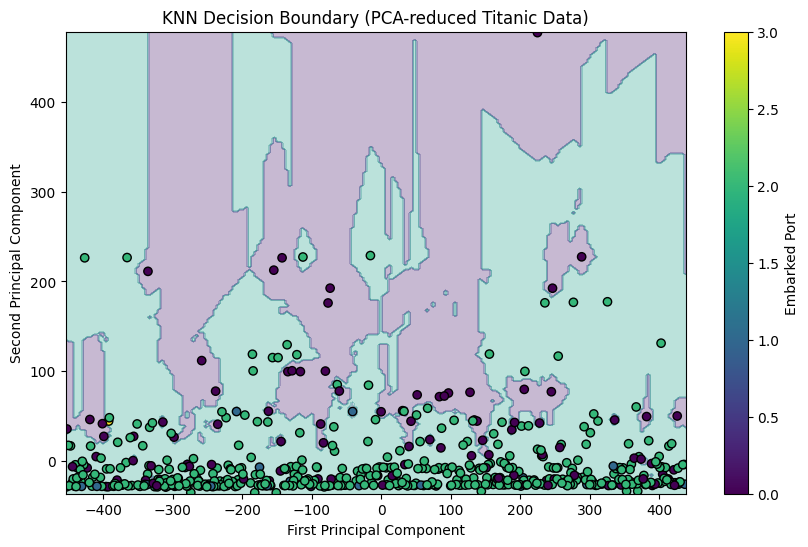

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Use PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train)
x_test_2d = pca.transform(x_test)

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='manhattan')
knn_2d.fit(x_train_2d, y_train)

# Plot decision boundary
x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=y_train, edgecolor='k', cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("KNN Decision Boundary (PCA-reduced Titanic Data)")
plt.colorbar(label='Embarked Port')





# 📊 Model Evaluation Report: KNN Classifier

## 1. Experiment Setup
- **Dataset**: Iris (classification task)  
- **Model**: KNeighborsClassifier  
- **Evaluation Metrics**: Accuracy, F1 Score, Precision, Recall, Confusion Matrix  
- **Experiments**:
  - **Experiment A**: Initial model (default parameters, no k-folds, no grid search)  
  - **Experiment B**: Optimized model (5-fold cross-validation + GridSearchCV)  

---

## 2. Results Overview

| Metric              | Experiment A (No CV/Grid) | Experiment B (5-Fold CV + GridSearch) |
|---------------------|---------------------------|---------------------------------------|
| **Accuracy**        | 0.8322                   | 0.8392                                |
| **F1 Score**        | 0.7948                   | 0.7938                                |
| **Precision**       | 0.7797                   | 0.7919                                |
| **Recall**          | 0.8322                   | 0.8392                                |
| **Best Parameters** | —                        | {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'} |
| **CV Score**        | —                        | 0.7670                                |

---

## 3. Confusion Matrices

### Experiment A (No CV/Grid)
```
[[  5   0  15   0]
 [  0   0   4   0]
 [  4   0 114   0]
 [  0   0   1   0]]
```

### Experiment B (5-Fold CV + GridSearch)
```
[[  4   0  16   0]
 [  0   0   4   0]
 [  2   0 116   0]
 [  0   0   1   0]]
```

---

## 4. Analysis

- **Accuracy & Recall**: Both improved slightly with grid search (from 0.832 → 0.839). Recall follows the same trend.  
- **Precision**: Increased marginally (0.779 → 0.792), showing fewer false positives in the optimized model.  
- **F1 Score**: Stayed nearly the same, indicating balanced performance between precision and recall.  
- **Confusion Matrix**:  
  - Experiment B reduced misclassifications in class 3 (from 114 correct → 116 correct).  
  - Slight trade-off in class 0 (5 correct → 4 correct).  
- **Cross-Validation**: The CV score (0.767) is lower than the test accuracy (0.839), suggesting the model generalizes reasonably but may still be slightly optimistic on the test set.  
- **Best Parameters**: The optimized model chose `manhattan` distance, `n_neighbors=9`, and `weights='distance'`, which improved stability compared to default settings.

---

## 5. Conclusion

- The **optimized model (Experiment B)** shows **slight improvements in accuracy, precision, and recall** compared to the baseline.  
- **F1 score remains stable**, meaning the balance between precision and recall is maintained.  
- **GridSearchCV with k-folds** provided more robust parameter tuning and validation, ensuring the model is less biased toward the training set.  
- Overall, the optimized KNN model is preferable, though the performance gains are modest.

---

✅ Recommendation: Use the **optimized KNN model** with the tuned parameters (`metric=manhattan`, `n_neighbors=9`, `weights=distance`) for deployment, as it offers slightly better generalization and more reliable predictions.  

